In [2]:
import numpy as np
from argparse import Namespace
from itertools import chain

%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot

```
for np in 16 20 24 28 32; do for mt in 0.00003 0.0001 0.0003 0.001; do PYTHONPATH=.  python  track1_baseline_faiss/baseline_faiss_filtered.py     --dataset yfcc-10M --indexname data/yfcc100M/baseline_index_ivf16ksq_binsig0.1.faissindex     --indexkey IVF16384,SQ8     --binarysig --binarysig_proba1 0.1 --binarysig_file data/yfcc100M/baseline_index_ivf16ksq_binsig0.1.pickle --nt 16 --nprobe $np --metadata_threshold $mt; done ; done | tee data/yfcc100M/mt_log_clipdesc
```

In [18]:
all_res = []
ns1 = None
for line in chain(
        open("../data/yfcc100M/mt_log_clipdesc"), 
        open("../data/yfcc100M/mt_log_clipdesc_2"), 
        open("../data/yfcc100M/mt_log_clipdesc_3"), 
    ): 
    if line.startswith("args: Namespace("): 
        ns = line[6:-1]
        ns = eval(ns)
        all_res.append(ns)
        ns1 = None    
    elif "metadata first search:" in line: 
        fi = line.split(":")[1].split(',')
        # print()
        ns.nq_meta = int(fi[0])
        ns.time_meta = float(fi[1][:-2])
    elif "IVF first search" in line: 
        fi = line.split(":")[1].split(',')
        ns.nq_ivf = int(fi[0])
        ns.time_ivf = float(fi[1][:-2])
    elif "time" in line and "recall" in line: 
        fi = line.split()
        ns.time = float(fi[1])
        ns.recall = float(fi[3])
        

In [19]:
mts = set(res.metadata_threshold for res in all_res)
mts = list(sorted(mts))

nps = set(res.nprobe for res in all_res)
nps = list(sorted(nps))

print("", end="\t\t")
for np in nps: 
    print("%6d" % np, end="\t")
print()
for mt in mts: 
    print(f"{mt=:7g}", end="\t")
    for np in nps: 
        res, = [res for res in all_res if res.metadata_threshold == mt and res.nprobe == np]
        print("%.4f" % res.recall, end="\t")
    print()

		    16	    20	    24	    28	    32	    36	    40	
mt=  3e-05	0.7545	0.7782	0.7973	0.8124	0.8247	0.8353	0.8447	
mt= 0.0001	0.7806	0.8032	0.8211	0.8354	0.8470	0.8570	0.8658	
mt= 0.0003	0.8174	0.8380	0.8541	0.8669	0.8773	0.8861	0.8937	
mt=  0.001	0.8610	0.8782	0.8917	0.9022	0.9107	0.9177	0.9239	
mt=  0.003	0.8966	0.9104	0.9211	0.9294	0.9359	0.9413	0.9460	
mt=   0.01	0.9367	0.9458	0.9528	0.9581	0.9623	0.9658	

ValueError: not enough values to unpack (expected 1, got 0)

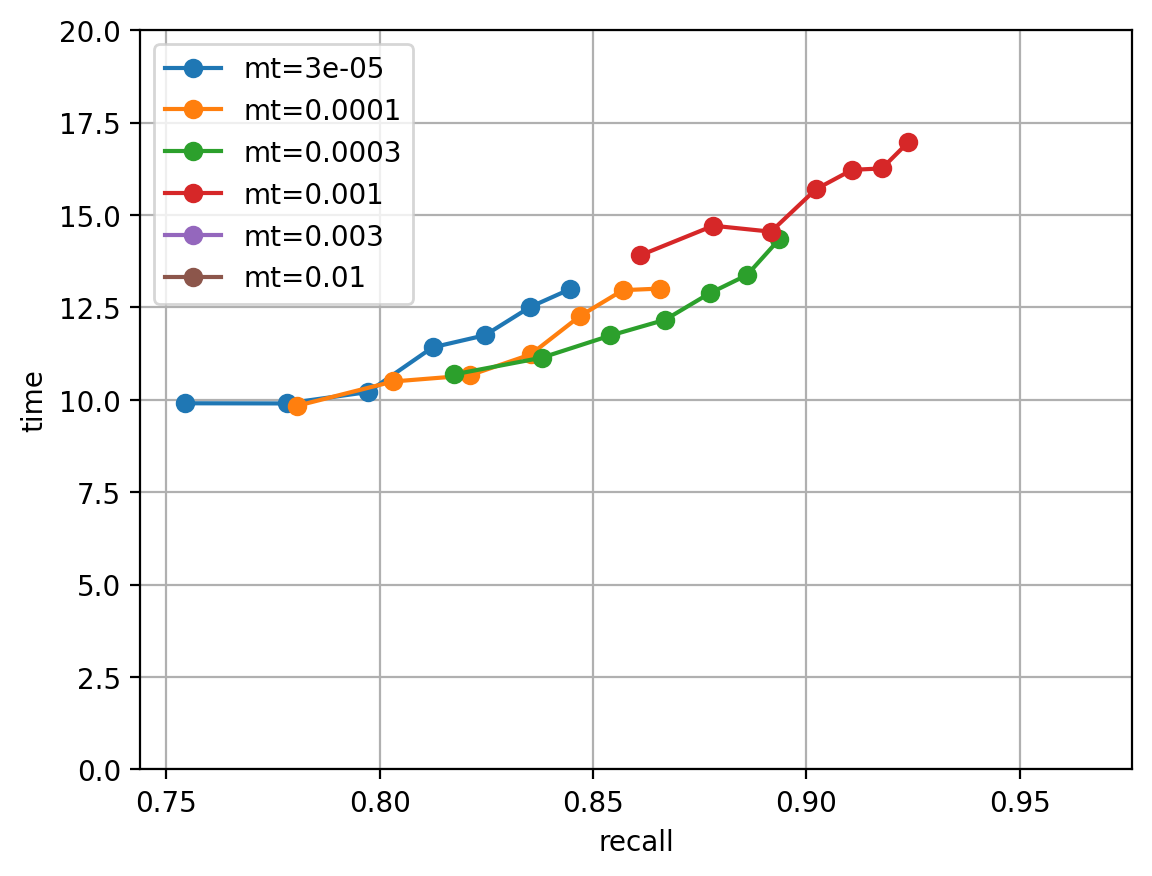

In [20]:
for mt in mts: 
    res2 = [res for res in all_res if res.metadata_threshold == mt]
    
    pyplot.plot(
        [res.recall for res in res2],
        [res.time for res in res2], 
        'o-',
        label="mt=%g" % mt
    )
pyplot.xlabel("recall")
pyplot.ylim([0, 20])

pyplot.ylabel("time")
pyplot.legend()
pyplot.grid()

# With old (dummy2) descriptors 

```
for mt in 0.01 0.001 0.0001 0.00001; do for np in 16 64 256 1024; do PYTHONPATH=. python  track1_baseline_faiss/baseline_faiss_filtered.py --dataset yfcc-10M --indexname data/yfcc100M/baseline_index.faissindex --nprobe $np --nq 10000 --metadata_threshold $mt ; done; done | tee /tmp/log
# then edited to make log.2


for mt in 0.1 0.01 0.001 0.0001; do for np in 16 64 256 1024; do PYTHONPATH=. python  track1_baseline_faiss/baseline_faiss_filtered.py --dataset yfcc-10M --indexname data/yfcc100M/baseline_index.faissindex --nprobe $np --nq 10000 --metadata_threshold $mt ; done; done | tee data/yfcc100M/mt_log_2


for mt in 0.1 0.01 0.001 0.0001; do for np in 16 64 256 1024; do PYTHONPATH=. python  track1_baseline_faiss/baseline_faiss_filtered.py --dataset yfcc-10M --indexname data/yfcc100M/baseline_index_ivf16ksq_binsig0.1.faissindex --nprobe $np --metadata_threshold $mt --binarysig --binarysig_file data/yfcc100M/baseline_index_ivf16ksq_binsig0.1.pickle; done; done | tee data/yfcc100M/mt_log_with_binsig

```

In [38]:
all_res = []
ns1 = None
for line in chain(open("../data/yfcc100M/mt_log_2"), open("../data/yfcc100M/mt_log_3")): 
    if line.startswith("args: Namespace("): 
        #ns1 = line[6:-1]
        #elif ns1 is not None: 
        #ns = ns1 + line 
        # print("ns=", ns)
        ns = line[6:-1]
        ns = eval(ns)
        all_res.append(ns)
        ns1 = None    
    elif "metadata first search:" in line: 
        fi = line.split(":")[1].split(',')
        # print()
        ns.nq_meta = int(fi[0])
        ns.time_meta = float(fi[1][:-2])
    elif "IVF first search" in line: 
        fi = line.split(":")[1].split(',')
        ns.nq_ivf = int(fi[0])
        ns.time_ivf = float(fi[1][:-2])
    elif "time" in line and "recall" in line: 
        fi = line.split()
        ns.time = float(fi[1])
        ns.recall = float(fi[3])
        

In [39]:
mts = set(res.metadata_threshold for res in all_res)
mts = list(sorted(mts))

nps = set(res.nprobe for res in all_res)
nps = list(sorted(nps))


In [40]:
for mt in mts: 
    print(f"{mt=:7g}", end="\t")
    for np in nps: 
        res, = [res for res in all_res if res.metadata_threshold == mt and res.nprobe == np]
        print("%.4f" % res.recall, end="\t")
    print()

mt= 0.0001	0.6598	0.8081	0.9173	0.9741	
mt=  0.001	0.7662	0.8828	0.9560	0.9874	
mt=  0.003	0.8163	0.9126	0.9690	0.9909	
mt=   0.01	0.8872	0.9496	0.9834	0.9949	
mt=    0.1	0.9818	0.9927	0.9978	0.9992	


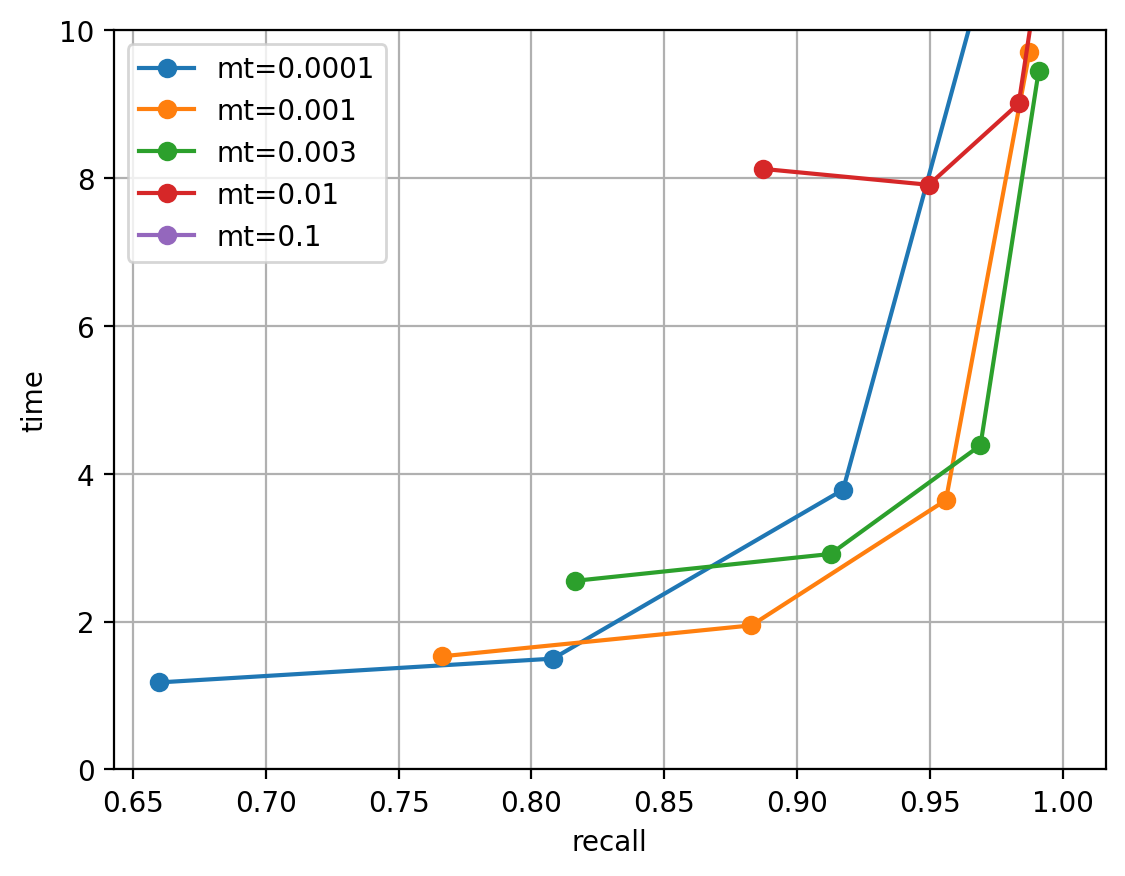

In [41]:
for mt in mts: 
    res2 = [res for res in all_res if res.metadata_threshold == mt]
    
    pyplot.plot(
        [res.recall for res in res2],
        [res.time for res in res2], 
        'o-',
        label="mt=%g" % mt
    )
pyplot.xlabel("recall")
pyplot.ylim([0, 10])

pyplot.ylabel("time")
pyplot.legend()
pyplot.grid()


In [42]:
10000 / 2

5000.0

In [68]:
all_res = []
ch = chain(
    open("../data/yfcc100M/mt_log_with_binsig"), 
    open("../data/yfcc100M/mt_log_with_binsig_2"),
    open("../data/yfcc100M/mt_log_with_binsig_3"),    
)
for line in ch:
    if line.startswith("args: Namespace("): 
        #ns1 = line[6:-1]
        #elif ns1 is not None: 
        #ns = ns1 + line 
        # print("ns=", ns)
        ns = line[6:-1]
        ns = eval(ns)
        all_res.append(ns)
        ns1 = None    
    elif "metadata first search:" in line: 
        fi = line.split(":")[1].split(',')
        # print()
        ns.nq_meta = int(fi[0])
        ns.time_meta = float(fi[1][:-2])
    elif "IVF first search" in line: 
        fi = line.split(":")[1].split(',')
        ns.nq_ivf = int(fi[0])
        ns.time_ivf = float(fi[1][:-2])
    elif "time" in line and "recall" in line: 
        fi = line.split()
        ns.time = float(fi[1])
        ns.recall = float(fi[3])
        

In [69]:
mts = set(res.metadata_threshold for res in all_res)
mts = list(sorted(mts))

nps = set(res.nprobe for res in all_res)
nps = list(sorted(nps))


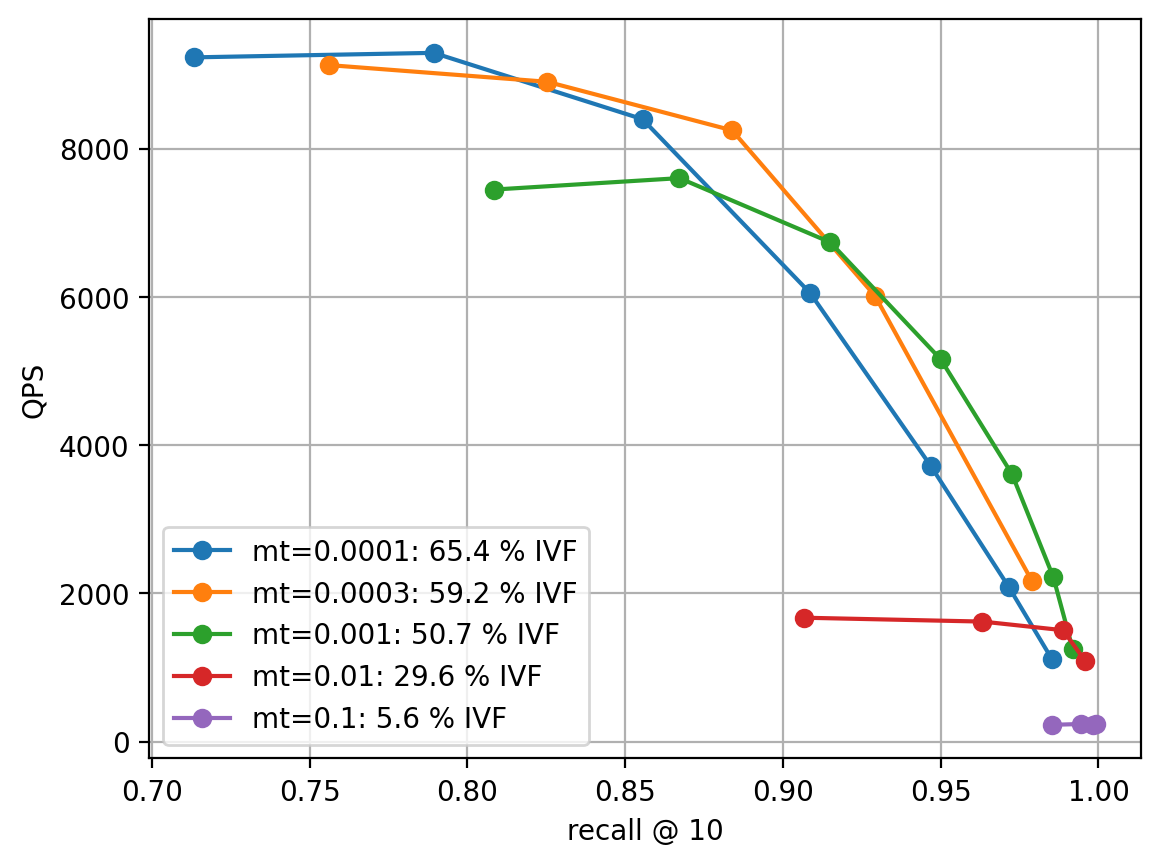

In [70]:
nq = 10e5
for mt in mts: 
    res2 = [res for res in all_res if res.metadata_threshold == mt]
    if not res2: 
        continue
    res2.sort(key=lambda x: x.recall)
    resx = res2[0] # any of them
    nq = resx.nq_ivf + resx.nq_meta
    
    pyplot.plot(
        [res.recall for res in res2],
        [nq / res.time for res in res2], 
        'o-',
        label="mt=%g: %.1f %% IVF" % (mt, 100 * resx.nq_ivf / nq)
    )
pyplot.xlabel("recall @ 10")
# pyplot.ylim([0, 100])

pyplot.ylabel("QPS")
pyplot.legend()
pyplot.grid()
